In [9]:
#!/usr/bin/env python
#-*- coding: utf-8 -*-
'''
    python ==> 비주얼컴퓨팅,
'''
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import scipy.misc
import scipy.io
import random
import cv2
from PIL import Image
import math
import os

In [2]:

#-----------------------------------------------------------------
# train_original
# pos_neg_train 데이터를 불러오기 위한 데이터 전처리 코드

pos_path = 'D:\\edward\\visualComputing_humanDetection\\pos\\pos_train\\'

neg_path = 'D:\\edward\\visualComputing_humanDetection\\neg\\neg_train\\'

pos_fnames = os.listdir(pos_path)
neg_fnames = os.listdir(neg_path)


# 데이터 파일들의 이름을 데이터 처리하기 쉽게 변경한다
cnt = 0
for fname in pos_fnames:
    os.rename(pos_path + fname, pos_path + 'pos_train_' + str(cnt) +'.png')
    cnt += 1

# neg 이미지들의 사이즈를 70 x 134으로 수정한다
cnt = 1
for _ in range(0, 500):
    img = Image.open(neg_path + 'Image'+str(cnt) +'.bmp') # image extension *.png,*.jpg
    new_width  = 70
    new_height = 134
    img = img.resize((new_width, new_height), Image.ANTIALIAS)
    img.save(neg_path + 'Image' + str(cnt) + '.bmp') # format may what u want ,*.png,*jpg,*.gif
    cnt += 1






FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'D:\\edward\\visualComputing_humanDetection\\pos\\pos_train\\pos_train_10.png' -> 'D:\\edward\\visualComputing_humanDetection\\pos\\pos_train\\pos_train_2.png'

In [ ]:
# neg 이미지들의 사이즈를 70 x 134으로 수정한다
cnt = 1
for _ in range(0, 500):
    img = Image.open(neg_path + 'Image'+str(cnt) +'.bmp') # image extension *.png,*.jpg
    new_width  = 70
    new_height = 134
    img = img.resize((new_width, new_height), Image.ANTIALIAS)
    img.save(neg_path + 'Image' + str(cnt) + '.bmp') # format may what u want ,*.png,*jpg,*.gif
    cnt += 1


In [3]:

#-----------------------------------------------------------------
# test_original
# pos_neg_test 데이터를 불러오기 위한 데이터 전처리 코드

pos_path2 = 'D:\\edward\\visualComputing_humanDetection\\pos\\pos_test\\'
neg_path2 = 'D:\\edward\\visualComputing_humanDetection\\neg\\neg_test\\'

pos_fnames2 = os.listdir(pos_path2)
neg_fnames2 = os.listdir(neg_path2)


# 데이터 파일들의 이름을 데이터 처리하기 쉽게 변경한다
cnt = 0
for fname in pos_fnames2:
    os.rename(pos_path2 + fname, pos_path2 + 'pos_test_' + str(cnt) +'.png')
    cnt += 1

# neg 이미지들의 사이즈를 70 x 134으로 수정한다
# Image533.bmp 파일이 없어서 534파일을 하나 복사해서 사용했다
cnt = 501
for _ in range(0, 100):
    img = Image.open(neg_path2 + 'Image'+str(cnt) +'.bmp') # image extension *.png,*.jpg
    new_width  = 70
    new_height = 134
    img = img.resize((new_width, new_height), Image.ANTIALIAS)
    img.save(neg_path2 + 'Image' + str(cnt) + '.bmp') # format may what u want ,*.png,*jpg,*.gi
    cnt += 1
    
img = Image.open(neg_path2 + 'Image600.bmp') # image extension *.png,*.jpg
img = img.resize((new_width, new_height), Image.ANTIALIAS)
img.save(neg_path2 + 'Image600.bmp')


FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'D:\\edward\\visualComputing_humanDetection\\pos\\pos_test\\pos_test_10.png' -> 'D:\\edward\\visualComputing_humanDetection\\pos\\pos_test\\pos_test_2.png'

In [11]:





#----------------------------------------------------------
# train_original
# pos 700장 + neg 500장 이미지를 train_images에 저장하고 
# train_label를 1,1,1,1,1,......0,0,0,0,0 으로 저장한다

train_images = []
train_images_hog = []
t_labels = []

# pos Image 데이터 700장을 불러온다 (grayscale)
for num in range(0,700):
    train_images.append(scipy.misc.imread(pos_path 
             + 'pos_train_'+ str(num)+'.png', flatten=True))

# neg Image 데이터 500장을 불러온다 (grayscale)
for num in range(1,501):
    train_images.append(scipy.misc.imread(neg_path + 'Image'+ str(num)+'.bmp', flatten=True))

# Image 데이터를 numpy 데이터로 수정한다
train_images = np.array(train_images)
# HOG Feature 작업을 위한 변수
train_images_hog = np.array(train_images)
train_images = train_images.reshape(1200, 9380, )


# Label 데이터는 1 * 700 , 0 * 500의 행벡터로 생성한다
t_labels = np.append(np.ones([1,700]) , np.zeros([1,500]))

# train Label 데이터를 [1 x 100] 의 행렬로 표현한다
#           예를 들어 3이면 [0,0,1,0,.....,0] 과 같이 설정한다
train_labels  = np.array(np.zeros(2400).reshape(1200,2))
for num in range(0,1200):
    train_labels[num][int(t_labels[num]) - 1] = 1





#----------------------------------------------------------
# test_original
# pos 192장 + neg 100장 이미지를 train_images에 저장하고 
# train_label를 1,1,1,1,1,......0,0,0,0,0 으로 저장한다

test_images = []
te_labels = []

# pos Image 데이터 192장을 불러온다 (grayscale)
for num in range(0,192):
    test_images.append(scipy.misc.imread(pos_path2 + 'pos_test_'+ str(num)+'.png', flatten=True))

# neg Image 데이터 500장을 불러온다 (grayscale)
for num in range(501,601):
    test_images.append(scipy.misc.imread(neg_path2 + 'Image'+ str(num)+'.bmp', flatten=True))

# Image 데이터를 numpy 데이터로 수정한다
test_images = np.array(test_images)
# HOG Feature 작업을 위한 변수
test_images_hog = np.array(test_images)
test_images = test_images.reshape(292, 9380, )

# Label 데이터는 1 * 700 , 0 * 500의 행벡터로 생성한다
te_labels = np.append(np.ones([1,192]) , np.zeros([1,100]))


# train Label 데이터를 [1 x 100] 의 행렬로 표현한다
#           예를 들어 3이면 [0,0,1,0,.....,0] 과 같이 설정한다
test_labels  = np.array(np.zeros(584).reshape(292,2))
for num in range(0,292):
    test_labels[num][int(te_labels[num]) - 1] = 1




# train, test 이미지 데이터를 0 ~ 1 사이 값으로 정규화합니다
train_images = train_images / 255.
train_images_hog = train_images_hog / 255.
test_images = test_images / 255.
test_images_hog = test_images_hog / 255.



In [12]:

#-----------------------------------------------------------------
_num_examples = 1200   # 데이터 갯수
_index_in_epoch = 0   # epoch
_images = train_images  # Image 변수 
_labels = train_labels  # Label 변수
_epochs_completed = 0   

# batch 연산을 수행하는 함수
# 호출될 때마다 랜덤으로 batch_size의 (Image, Label) 데이터를 반환한다
def next_batch(batch_size):
    """Return the next `batch_size` examples from this data set."""
    global _index_in_epoch
    global _images
    global _labels
    global _epochs_completed

    start = _index_in_epoch
    _index_in_epoch += batch_size

    if _index_in_epoch > _num_examples:
      # Finished epoch
      _epochs_completed += 1

      # Shuffle the data
      perm = np.arange(_num_examples)
      np.random.shuffle(perm)
      _images = _images[perm]
      _labels = _labels[perm]

      # Start next epoch
      start = 0
      _index_in_epoch = batch_size
      assert batch_size <= _num_examples

    end = _index_in_epoch
    return _images[start:end], _labels[start:end]


# 가중치를 초기화하는 함수 (정규분포 stddev=0.1로 초기화한다)
def weight_variable(shape):
	initial = tf.truncated_normal(shape, stddev=0.1)
	return tf.Variable(initial)


# 바이어스를 초기화하는 함수 (0.1로 초기화한다)
def bias_variable(shape):
	initial = tf.constant(0.1, shape=shape)
	return tf.Variable(initial)


# 컨벌루션을 실행하는 함수
# padding = 'SAME' 입력과 출력의 이미지 크기가 같도록 해준다
# (28,28) --> (28,28)
# padding = 'VALID' 필터의 크기만큼 이미지 크기가 감소한다
def conv2d_valid(x, W):
	return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='VALID')


def conv2d_same(x, W):
	return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')


# max pooling을 실행하는 함수
def max_pool_2x2(x):
	return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')




In [13]:

#-----------------------------------------------------------------
# Tensorflow 코드
#-----------------------------------------------------------------

x = tf.placeholder("float32", [None, 9380]) # mnist data image of shape 134 x 70
y = tf.placeholder("float32", [None, 2]) 

W = tf.Variable(tf.zeros([9380,2]))
b = tf.Variable(tf.zeros([2]))


# 1st conv layer ----------------------
W_conv1 = weight_variable([8,8,1,32])
b_conv1 = bias_variable([32])

# -1 : 아직 디멘젼이 결정되지 않았다
# 1 : 흑백이므로 1을 삽입한다. 칼라이면 3을 삽입한다
# x은 9380x1인데 134x70x1로 행렬을 다시 만들어준다
x_image = tf.reshape(x, [-1, 134, 70, 1])

# y = x*w + b에 ReLU를 적용한다
# (134, 70) ==> (134, 70)
h_conv1 = tf.nn.relu(conv2d_same(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)
# (134, 70) ==> (67, 35)



# 2nd conv layer -----------------------
W_conv2 = weight_variable([4,4,32,64])
b_conv2 = bias_variable([64])

# (67, 35) ==> (64, 32)
h_conv2 = tf.nn.relu(conv2d_valid(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)
# (64, 32) ==> (32, 16)



# 1st fully connected layer -----------------------
W_fc1 = weight_variable([32*16*64, 5000])
b_fc1 = bias_variable([5000])

h_pool2_flat = tf.reshape(h_pool2, [-1, 32*16*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
# 위 연산으로 1000x1의 벡터가 생성된다



# Dropout ------------------------
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)



# 2nd fully connected layer --------------
W_fc2 = weight_variable([5000, 2])
b_fc2 = bias_variable([2])
y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2


# learning_rate 잘 설정하는게 중요하다.. 0.1로 하니 전혀 변화가 없었다
learning_rate = 1e-3


cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_conv))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)


init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


# 정답률을 계산한다  y_conv  vs  y
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))




In [14]:
#----------------------------------------------
batch_size = 50      # 한 루프에 몇개의 (Image, Label) 데이터를 학습하는지 설정
display_step = 100    # 루프를 돌면서 화면에 표시할 빈도 설정
saver = tf.train.Saver()
loopCount = 5000

for i in range(loopCount):
    costVal = 0.
    batch = next_batch(batch_size)
    # 20번 돌릴 때마다 결과를 확인한다
    if i % display_step == 0:
        train_accuracy = sess.run(accuracy,feed_dict={x:batch[0], y:batch[1], keep_prob:1.0})
        costVal = sess.run(cost, feed_dict={x: batch[0], y: batch[1], keep_prob:1.0})
    
        print('step', i , 'training_accuracy', train_accuracy,'cost', costVal)
        
        # 실제 학습과정 함수, dropout 50%를 토대로 학습한다
    sess.run(optimizer,feed_dict={x:batch[0],y:batch[1], keep_prob:0.5})
    if i == loopCount -1:
        saver.save(sess, "d:/edward/humanDetectionNoHOG2")
        print("[+] Done Save")






step 0 training_accuracy 0.94 cost 0.273218
step 100 training_accuracy 1.0 cost 0.060646
step 200 training_accuracy 1.0 cost 0.00541029
step 300 training_accuracy 1.0 cost 0.00331875
step 400 training_accuracy 1.0 cost 0.000720895
step 500 training_accuracy 1.0 cost 0.000202627
step 600 training_accuracy 1.0 cost 0.000164016
step 700 training_accuracy 1.0 cost 7.00079e-05
step 800 training_accuracy 1.0 cost 0.000121792
step 900 training_accuracy 1.0 cost 3.73136e-05
step 1000 training_accuracy 1.0 cost 1.28621e-05
step 1100 training_accuracy 1.0 cost 1.60923e-05
step 1200 training_accuracy 1.0 cost 1.3844e-05
step 1300 training_accuracy 1.0 cost 2.52063e-05
step 1400 training_accuracy 1.0 cost 1.42369e-05
step 1500 training_accuracy 1.0 cost 1.58035e-05
step 1600 training_accuracy 1.0 cost 3.82654e-06
step 1700 training_accuracy 1.0 cost 5.81204e-06
step 1800 training_accuracy 1.0 cost 1.07765e-06
step 1900 training_accuracy 1.0 cost 1.80716e-06
step 2000 training_accuracy 1.0 cost 1.0

KeyboardInterrupt: 

In [15]:
# 전부 학습이 끝나면 테스트 데이터를 넣어 정확도를 계산한다
test_accuracy = sess.run(accuracy,feed_dict={x: test_images, y: test_labels, keep_prob: 1.0})
print('test accuracy', test_accuracy)

test accuracy 0.914384


Label:  [0]
Prediction:  [0]


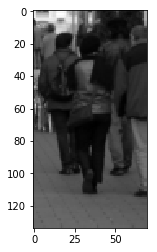

In [21]:

_num_examples_test = 292
#----------------------------------------------
# 임의의 사진 하나를 출력한 다음 맞혀보는 코드 
r = random.randint(0, _num_examples_test -1)
print ("Label: ", sess.run(tf.argmax(test_labels[r:r+1], 1)))
print ("Prediction: ", sess.run(tf.argmax(y_conv, 1), {x:test_images[r:r+1], keep_prob:1.0}))
plt.imshow(test_images[r:r+1].reshape(134, 70), cmap='gray', interpolation='nearest')
plt.show()





In [22]:
#------------------------------------------------------------
# HOG Processing
#------------------------------------------------------------

rows = 0
cols = 0
dImgX = 0
dImgY = 0
image_num, rows, cols = train_images_hog.shape
image_num_test, rows, cols = test_images_hog.shape

# HOG Feature를 뽑아내기 위해 가로, 세로로 픽셀을 미분하는 함수
# 픽셀의 미분 : 특별한 필터를 사용해 옆의 데이터와 뺄셈을 하는것
def derivate(img):
    global dImgX, dImgY, rows, cols

    dImgY = np.array(np.zeros(rows *cols).reshape(rows,cols))
    dImgX = np.array(np.zeros(rows *cols).reshape(rows,cols))

    for i in range(1, rows-2):
        dImgY[i,:] = img[i,:].round() - img[i+2,:].round()

    for i in range(1, cols-2):
        dImgX[:,i] = img[:,i].round() - img[:,i+2].round()




# 미분된 픽에서 Angle값을 계산하는 함수
def getAngle():
    global dImgX, dImgY, rows, cols

    angle = []
    PI = 3.14159

    for i in range(0, rows):
        for j in range(0, cols):
            angle.append(math.atan(dImgX[i][j] / dImgY[i][j]) * 180 / PI)
            
            leng = len(angle)

            if(angle[leng-1] < 165):
                angle[leng-1] += 90

    return angle



# 미분된 픽에서 Magnitude 값을 계산하는 함수
def getMagnitude():
    global dImgX, dImgY,rows, cols
    magnitude = []

    for i in range(0, rows):
        for j in range(0, cols):
            magnitude.append(math.sqrt(dImgX[i][j] **2 + dImgY[i][j] **2))

    return magnitude



def getHOGFeature(img, ang, mag):
    global rows, cols

    feature = []

    # angle, magnitude를 numpy 형식으로 변경한다
    ang = np.array(ang)
    mag = np.array(mag)

    ang = np.nan_to_num(ang)
    mag = np.nan_to_num(mag)
    
    ang = ang.reshape(rows,cols)
    mag = mag.reshape(rows,cols)

    mag_patch = []
    ang_patch = []
    angleA = []
    magA = []

    for i in range(0, int(rows/8 - 2) + 1): # 0 ~ 14 (15번)
        for j in range(0, int(cols/8 - 2) + 1): # 0 ~ 6 (7번)
            mag_patch = mag[8*i : 8*i+15,8*j :8*j+15]
            ang_patch = ang[8*i : 8*i+15,8*j :8*j+15]
            
            block_feature = []
            block_feature = np.array(block_feature)
        
            for x in range(0, 2):
                for y in range(0, 2):
                    angleA = ang_patch[8*x : 8*x+7,8*y :8*y+7]
                    magA = mag_patch[8*x :8*x+7,8*y :8*y+7]

                    histr = np.zeros([9])

                    for p in range(0,7):
                        for q in range(0,7):
                            alpha = angleA[p][q]

                            if alpha > 10 and alpha <= 30:
                                histr[0] = histr[0] + magA[p][q]*(30-alpha)/20
                                histr[1] = histr[1] + magA[p][q]*(alpha-10)/20
                            elif alpha > 30 and alpha <= 50:     
                                histr[1] = histr[1] + magA[p][q]*(50-alpha)/20
                                histr[2] = histr[2] + magA[p][q]*(alpha-30)/20
                            elif alpha > 50 and alpha <= 70:
                                histr[2] = histr[2] + magA[p][q]*(70-alpha)/20
                                histr[3] = histr[3] + magA[p][q]*(alpha-50)/20
                            elif alpha > 70 and alpha <= 90:
                                histr[3] = histr[3] + magA[p][q]*(90-alpha)/20
                                histr[4] = histr[4] + magA[p][q]*(alpha-70)/20
                            elif alpha > 90 and alpha <= 110:
                                histr[4] = histr[4] + magA[p][q]*(110-alpha)/20
                                histr[5] = histr[5] + magA[p][q]*(alpha-90)/20
                            elif alpha > 110 and alpha <= 130:
                                histr[5] = histr[5] + magA[p][q]*(130-alpha)/20
                                histr[6] = histr[6] + magA[p][q]*(alpha-110)/20
                            elif alpha > 130 and alpha <= 150:
                                histr[6] = histr[6] + magA[p][q]*(150-alpha)/20
                                histr[7] = histr[7] + magA[p][q]*(alpha-130)/20
                            elif alpha > 150 and alpha <= 170:
                                histr[7] = histr[7] + magA[p][q]*(170-alpha)/20
                                histr[8] = histr[8] + magA[p][q]*(alpha-150)/20
                            elif alpha >= 0 and alpha <= 10:
                                histr[0] = histr[0] + magA[p][q]*(alpha+10)/20
                                histr[8] = histr[8] + magA[p][q]*(10-alpha)/20
                            elif alpha > 170 and alpha <= 180:
                                histr[8] = histr[8] + magA[p][q]*(190-alpha)/20
                                histr[0] = histr[0] + magA[p][q]*(alpha-170)/20

                    
                    block_feature=np.hstack((block_feature, histr))

            block_feature = block_feature/math.sqrt(np.linalg.norm(block_feature, ord=2)**2 + 0.01)
            feature = np.hstack((feature, block_feature))

    feature = np.nan_to_num(feature)
    feature = feature / math.sqrt(np.linalg.norm(feature, ord=2) **2 + .001)

    for z in range(0, feature.shape[0] - 1):
        if feature[z] > 0.2:
            feature[z] = 0.2

    feature = feature / math.sqrt(np.linalg.norm(feature, ord=2) **2 + .001)

    return feature



#----------------------------------------------------------------
# train_hog

hog_feature = []

# train 데이터의 HOG Feature 데이터를 추출한다
for i in range(0, image_num):
        derivate(train_images_hog[i])

        hog_angle = getAngle()
        hog_mag = getMagnitude()

        hog_feature.append(getHOGFeature(train_images_hog[i], hog_angle, hog_mag))




#----------------------------------------------------------------
# test_hog

# test 데이터의 HOG Feature 데이터를 추출한다
hog_feature_test = []

for i in range(0, image_num_test):
        derivate(test_images_hog[i])

        hog_angle_test = getAngle()
        hog_mag_test = getMagnitude()

        hog_feature_test.append(getHOGFeature(test_images_hog[i], hog_angle_test, hog_mag_test))



hog_feature = np.array(hog_feature)
hog_feature_test = np.array(hog_feature_test)

c:\programdata\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in double_scalars
c:\programdata\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in double_scalars


In [37]:
#----------------------------------------------
# HOG Feature Training
#----------------------------------------------


_num_examples = 1200   # 데이터 갯수
_index_in_epoch = 0   # epoch
_images = hog_feature  # Image 변수 for HOG
_labels = train_labels  # Label 변수
_epochs_completed = 0   

# batch 연산을 수행하는 함수
# 호출될 때마다 랜덤으로 batch_size의 (Image, Label) 데이터를 반환한다
def next_batch(batch_size):
    """Return the next `batch_size` examples from this data set."""
    global _index_in_epoch
    global _images
    global _labels
    global _epochs_completed

    start = _index_in_epoch
    _index_in_epoch += batch_size

    if _index_in_epoch > _num_examples:
      # Finished epoch
      _epochs_completed += 1

      # Shuffle the data
      perm = np.arange(_num_examples)
      np.random.shuffle(perm)
      _images = _images[perm]
      _labels = _labels[perm]

      # Start next epoch
      start = 0
      _index_in_epoch = batch_size
      assert batch_size <= _num_examples

    end = _index_in_epoch
    return _images[start:end], _labels[start:end]


In [24]:
#-----------------------------------------------------------------
# Tensorflow 코드 for HOG Feature
#-----------------------------------------------------------------

x = tf.placeholder("float32", [None, 3780]) # mnist data image of shape 134 x 70
y = tf.placeholder("float32", [None, 2]) 

W = tf.Variable(tf.zeros([3780,2]))
b = tf.Variable(tf.zeros([2]))


# 1st conv layer ----------------------
W_conv1 = weight_variable([10,5,1,32])
b_conv1 = bias_variable([32])

# -1 : 아직 디멘젼이 결정되지 않았다
# 1 : 흑백이므로 1을 삽입한다. 칼라이면 3을 삽입한다
# x은 9380x1인데 134x70x1로 행렬을 다시 만들어준다
x_image = tf.reshape(x, [-1, 105, 36, 1])

# y = x*w + b에 ReLU를 적용한다
# (105, 36) ==> (96, 32)
h_conv1 = tf.nn.relu(conv2d_valid(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)
# (96,32) ==> (48, 16)



# 2nd conv layer -----------------------
W_conv2 = weight_variable([4,4,32,64])
b_conv2 = bias_variable([64])

# (48,16) ==> (48,16)
h_conv2 = tf.nn.relu(conv2d_same(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)
# (48, 16) ==> (24, 8)



# 1st fully connected layer -----------------------
W_fc1 = weight_variable([24*8*64, 5000])
b_fc1 = bias_variable([5000])

h_pool2_flat = tf.reshape(h_pool2, [-1, 24*8*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
# 위 연산으로 5000x1의 벡터가 생성된다



# Dropout ------------------------
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)



# 2nd fully connected layer --------------
W_fc2 = weight_variable([5000, 2])
b_fc2 = bias_variable([2])
y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2


# learning_rate 잘 설정하는게 중요하다.. 0.1로 하니 전혀 변화가 없었다
learning_rate = 1e-3


cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_conv))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)


init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


# 정답률을 계산한다  y_conv  vs  y
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))



In [54]:
#----------------------------------------------
# HOG Feature Training
#----------------------------------------------
batch_size = 50      # 한 루프에 몇개의 (Image, Label) 데이터를 학습하는지 설정
display_step = 100    # 루프를 돌면서 화면에 표시할 빈도 설정
saver_hog = tf.train.Saver()
loopCount = 5000

for i in range(loopCount):
    costVal = 0.
    batch = next_batch(batch_size)
    # 20번 돌릴 때마다 결과를 확인한다
    if i % display_step == 0:
        train_accuracy = sess.run(accuracy,feed_dict={x:batch[0], y:batch[1], keep_prob:1.0})
        costVal = sess.run(cost, feed_dict={x: batch[0], y: batch[1], keep_prob:1.0})
    
        print('step', i , 'training_accuracy', train_accuracy,'cost', costVal)
        
        # 실제 학습과정 함수, dropout 50%를 토대로 학습한다
    sess.run(optimizer,feed_dict={x:batch[0],y:batch[1], keep_prob:0.5})
    if i == loopCount-1:
        saver_hog.save(sess, "d:/edward/humanDetectionWithHOG")
        print("[+] Done Save")




step 0 training_accuracy 0.98 cost 0.0383732
step 100 training_accuracy 0.84 cost 0.314867
step 200 training_accuracy 0.98 cost 0.0410967
step 300 training_accuracy 0.98 cost 0.04648
step 400 training_accuracy 0.98 cost 0.0393799
step 500 training_accuracy 1.0 cost 0.0106191
step 600 training_accuracy 1.0 cost 0.0128771
step 700 training_accuracy 0.98 cost 0.0238691
step 800 training_accuracy 1.0 cost 0.00732668
step 900 training_accuracy 0.98 cost 0.0327914
step 1000 training_accuracy 1.0 cost 0.000821256
step 1100 training_accuracy 1.0 cost 0.00145889
step 1200 training_accuracy 1.0 cost 0.011259
step 1300 training_accuracy 1.0 cost 0.00681621
step 1400 training_accuracy 1.0 cost 0.00115637
step 1500 training_accuracy 1.0 cost 0.00174879
step 1600 training_accuracy 0.94 cost 0.109474
step 1700 training_accuracy 1.0 cost 0.00283828
step 1800 training_accuracy 0.98 cost 0.0677603
step 1900 training_accuracy 1.0 cost 0.00112777
step 2000 training_accuracy 1.0 cost 0.00170368
step 2100 t

In [56]:
# 전부 학습이 끝나면 테스트 데이터를 넣어 정확도를 계산한다
test_accuracy = sess.run(accuracy,feed_dict={x: hog_feature_test, y: test_labels, keep_prob: 1.0})
print('test accuracy', test_accuracy)

test accuracy 0.797945


Label:  [0]
Prediction:  [0]


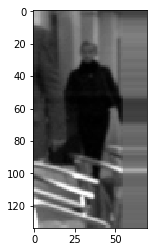

In [53]:

_num_examples_test = 292
#----------------------------------------------
# 임의의 사진 하나를 출력한 다음 맞혀보는 코드 
r = random.randint(0, _num_examples_test -1)
print ("Label: ", sess.run(tf.argmax(test_labels[r:r+1], 1)))
print ("Prediction: ", sess.run(tf.argmax(y_conv, 1), {x:hog_feature_test[r:r+1], keep_prob:1.0}))
plt.imshow(test_images[r:r+1].reshape(134, 70), cmap='gray', interpolation='nearest')
plt.show()

